In [2]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.
C:\Users\sushr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sushr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sushr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sushr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
from keras.preprocessing import image

In [4]:
ictal = "M:\\Spring\\Deep_Learning\\input\\class1"
preictal = "M:\\Spring\\Deep_Learning\\input\\class2"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from PIL import Image
import split_folders

ictal = "M:\\Spring\\Deep_Learning\\input\\class1"
preictal = "M:\\Spring\\Deep_Learning\\input\\class2"

cnt = 1
for img in os.listdir(ictal):
    imgpath = os.path.join(ictal,img)
    try:
        with Image.open(imgpath) as im:
            if(cnt>80):
                os.remove(imgpath)
            cnt = cnt+1
    except:
        os.remove(imgpath)

cnt = 1
for img in os.listdir(preictal):
    imgpath = os.path.join(preictal,img)
    try:
        with Image.open(imgpath) as im:
            if(cnt>80):
                os.remove(imgpath)
            cnt = cnt+1
    except:
        os.remove(imgpath)

# split_folders.ratio(cats, output="outcats", seed=1337, ratio=(.8, .1, .1)) # default values


In [6]:
inn = "M:\\Spring\\Deep_Learning\\input"
outt = "M:\\Spring\\Deep_Learning\\output"

In [7]:
split_folders.ratio(inn, output= outt, seed=None, ratio=(.8, .1,.1)) # default values

Copying files: 92 files [00:00, 1195.60 files/s]


In [8]:
train_dir = "M:\\Spring\\Deep_Learning\\output\\train"
test_dir = "M:\\Spring\\Deep_Learning\\output\\test"
val_dir = "M:\\Spring\\Deep_Learning\\output\\val"
train_ictal_dir = "M:\\Spring\\Deep_Learning\\output\\train\\ictal"
train_preictal_dir = "M:\\Spring\\Deep_Learning\\output\\train\\preictal"

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)
train_gen = train_data.flow_from_directory(train_dir, target_size=(1280,23),batch_size=20, class_mode='binary')
val_gen = test_data.flow_from_directory(val_dir, target_size=(1280,23),batch_size=20, class_mode='binary')
test_gener = test_data.flow_from_directory(test_dir,target_size=(1280,23),batch_size=20,class_mode = 'binary')

Found 91 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,2),activation = 'relu',input_shape=(1280,23,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32,(3,2),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32,(3,2),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32,(3,2),activation = 'relu'))
# model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1278, 22, 32)      608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 639, 11, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 639, 11, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 637, 10, 32)       6176      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 318, 5, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 318, 5, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 316, 4, 32)      

In [11]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['acc',tf.keras.metrics.SpecificityAtSensitivity(0.7),tf.keras.metrics.SensitivityAtSpecificity(0.7)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit_generator(train_gen,steps_per_epoch=30,epochs=15,validation_data=val_gen,validation_steps=50)
model.save('icteegtheir.h5')


Epoch 1/15
30/30 [==============================] - 16s 542ms/step - loss: 0.6586 - acc: 0.6007 - val_loss: 0.6055 - val_acc: 0.4667
Epoch 2/15
30/30 [==============================] - 18s 589ms/step - loss: 0.3609 - acc: 0.8425 - val_loss: 0.1610 - val_acc: 0.9333
Epoch 3/15
30/30 [==============================] - 23s 767ms/step - loss: 0.3939 - acc: 0.8498 - val_loss: 0.4472 - val_acc: 0.7667
Epoch 4/15
30/30 [==============================] - 21s 699ms/step - loss: 0.2311 - acc: 0.9121 - val_loss: 0.9943 - val_acc: 0.6667
Epoch 5/15
30/30 [==============================] - 21s 685ms/step - loss: 0.1474 - acc: 0.9359 - val_loss: 0.9186 - val_acc: 0.7000
Epoch 6/15
30/30 [==============================] - 19s 643ms/step - loss: 0.2111 - acc: 0.9212 - val_loss: 1.0434 - val_acc: 0.5667
Epoch 7/15
30/30 [==============================] - 21s 695ms/step - loss: 0.1841 - acc: 0.9176 - val_loss: 0.8583 - val_acc: 0.5667
Epoch 8/15
30/30 [==============================] - 19s 641ms/step -

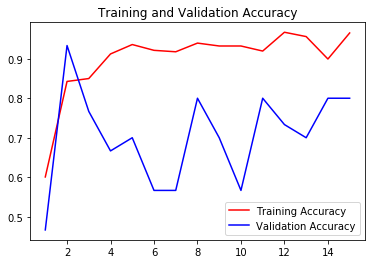

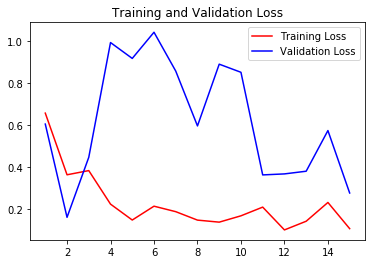

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

#plot accuracy
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#plot Loss
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

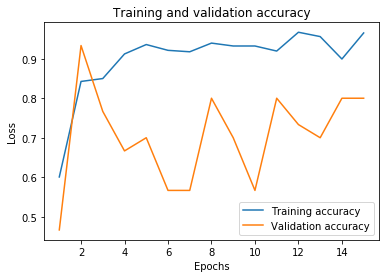

In [16]:
acc = history.history['acc']
valacc = history.history['val_acc']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,acc,label='Training accuracy')
plt.plot(epochs,valacc,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model.evaluate_generator(test_gener,steps = 50)
print('test acc:', test_acc)

test acc: 0.8999999761581421
